## Get some images

Get some example images to practice with.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load an image
file_im = '../02_Images/example_im.png'
file_mask = '../02_Images/example_mask.png'

im = plt.imread(file_im)
mask = plt.imread(file_mask)


We can display the image and mask real quick to see what we are working with.

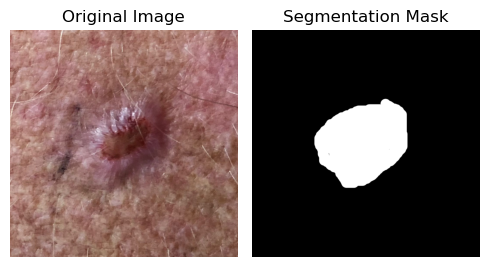

In [2]:
def display_images(im1, im2, title_1: str, title_2: str):
    # Display im and mask side by side
    fig, axes = plt.subplots(1, 2, figsize=(5, 3))
    # Display im1
    axes[0].imshow(im1, cmap='gray')
    axes[0].set_title(title_1)
    axes[0].axis('off')
    # Display im2
    axes[1].imshow(im2, cmap='gray')
    axes[1].set_title(title_2)
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()
    return

display_images(im, mask, 'Original Image', 'Segmentation Mask')

## Exploring some simple features

The code below simply measures how much of the image is taken up by the lesion.  
It is probably not a good feature, but gives an example of how we can measure things using the mask.


In [ ]:
#Total size of the image
total = mask.shape[0] * mask.shape[1]
print(f"The total size of the image: \n{total}")

#Size of mask only
area = np.sum(mask)
print(f"The size of the mask: \n{area:.2f}")

#As percentage
feature_percentage_area = area/total*100
print(f"Percentage of image that is a lesion: \n{feature_percentage_area:.2f}%")


The total size of the image: 
1102500
The size of the mask: 
124241.29
%age of image that is a lesion: 
11.27%


## Measuring height/width of the lesions

We can use similar principles to measure how tall/wide the lesion is in pixels (this is NOT the diameter of the lesion in real-life, but can help in further feature implementations.

The idea is to find out how many white pixels there are in each row or column of the lesion. This can be achieved with

* np.sum across different axes of the image -> this creates a vector
* finding the maximum value in that vector -> this creates a single number

**Implement** this code below and inspect the shapes and values of the variables you need to use.

**Question**: You might find that the height/width is not a whole number. How is this possible? How can we fix it?

In [4]:
# YOUR CODE HERE

# height = 

# You can do the same for the lesion mask width
# width = 

# ---SOLUTION---

# How many 1's in each column of the image (sum over axis 0, i.e. rows).
# mask>0 to ensure we only have binary values (this might not be the case depending how we load the image)
pixels_in_col = np.sum(mask>0, axis=0)
print(mask.shape)
print(pixels_in_col.shape)


max_pixels_in_col = np.max(pixels_in_col)
print('height is', max_pixels_in_col)

# Analogous solution for the width
pixels_in_row = np.sum(mask>0, axis=1)
max_pixels_in_row = np.max(pixels_in_row)
print('width is', max_pixels_in_row)

# Example function
def get_height(mask):
    height = np.max(np.sum(mask>0, axis=0))
    return height

(1050, 1050)
(1050,)
height is 376
width is 430


## Image width / height at an angle

To get a better idea about the shape, we want to measure the lesion diameter at an angle.  
This is, as with many features, easier to do if you first adapt the image, and then do a more straightforward measurement (rather than trying to count pixels on a diagonal).

Study documentation of [transform.rotate](https://scikit-image.org/docs/0.25.x/api/skimage.transform.html#skimage.transform.rotate), and implement code to measure the diameter at a 45 degree angle.

Height is 442


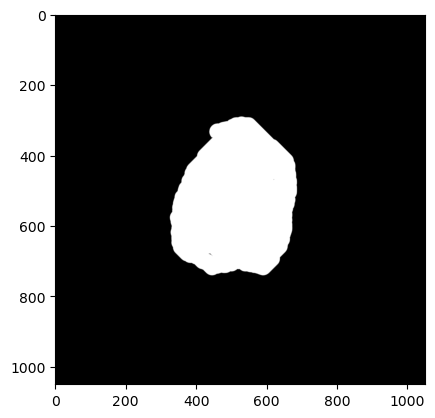

In [5]:
from skimage import transform

# YOUR CODE HERE


# ----SOLUTION----

# General rule of thumb - create a simpler image first, then do the measurement

rot_im = transform.rotate(mask, 45)
plt.imshow(rot_im, cmap='gray')

# Now we can measure as before by counting pixels in rows/columns as before
h = get_height(rot_im)
print(f"Height is {h}")

## Perimeter

Let's find all the pixels on the perimeter of the lesion. Again here, rule of thumb applies: first we create the image, then do a simple measurement. You will need to use [morphology](https://scikit-image.org/docs/stable/api/skimage.morphology.html) operations here.

Plot the original and the perimeter-only image side by side to check your result.

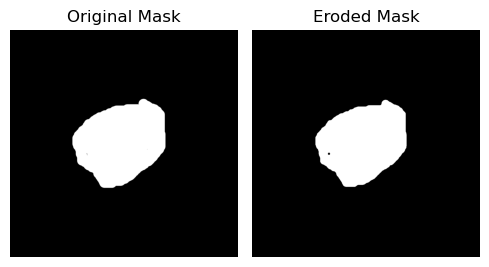

124241.29
118312


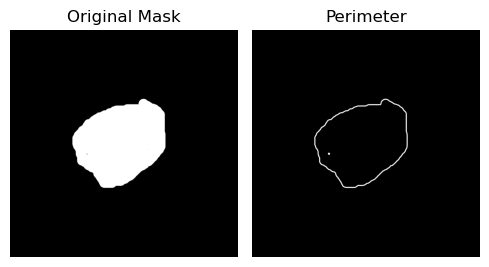

In [6]:
from skimage import morphology

# Hint: Consider erosion, look at the Morphology notebook from this week.
# YOUR CODE HERE

#----SOLUTION----

#Structural element, that we will use as a "brush" on our mask
struct_el = morphology.disk(5)

# Use this "brush" to erode the image - eat away at the borders
mask_eroded = morphology.binary_erosion(mask, struct_el)

# Show side by side (depending on brush size, you might not see a difference visually)
display_images(mask, mask_eroded, 'Original Mask', 'Eroded Mask')

# Verify the new mask is smaller
print(area)
print(np.sum(mask_eroded))

# Now we can find the pixels that have value 1 in the original mask but not in the eroded mask
perimeter_im = mask - mask_eroded
display_images(mask, perimeter_im>0, 'Original Mask', 'Perimeter')


## Color with SLIC

Thi is an example of using SLIC to find areas with similar colors in the image. The slic function outputs which superpixel each image belongs to, the mark_boundaries is only for visualization.

Investigate different parameters of SLIC, when do you get a nice result?

Inspect the segments_slic variable. How can you use this to only get the pixel values for a specific segment?


(1050, 1050, 4)
(1050, 1050)


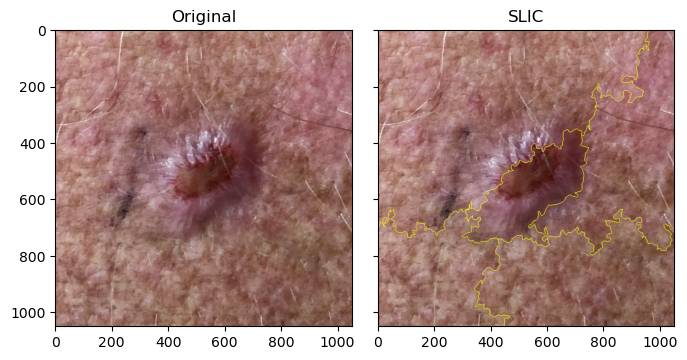

In [7]:
# SLIC clustering - see also https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_segmentations.html

from skimage.segmentation import slic, mark_boundaries

example_im = im.astype(float)
example_im = example_im[:,:,0:3]

# Divide the pixels into segments of similar color
segments_slic = slic(example_im, n_segments=20, compactness=1, sigma=3)

print(im.shape)
print(segments_slic.shape)

# Show the results
fig, ax = plt.subplots(1, 2, figsize=(7, 7), sharex=True, sharey=True)

ax[0].imshow(im)
ax[0].set_title("Original")

ax[1].imshow(mark_boundaries(example_im, segments_slic))
ax[1].set_title('SLIC')

plt.tight_layout()
plt.show()
